In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-08-28 11:06:04.581423: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-28 11:06:04.606004: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 11:06:04.999361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = tf.keras.utils.image_dataset_from_directory('data/train')

Found 2401 files belonging to 2 classes.


2023-08-28 11:06:05.703086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-28 11:06:05.718730: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-28 11:06:05.718858: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
test = tf.keras.utils.image_dataset_from_directory('data/test')

Found 260 files belonging to 2 classes.


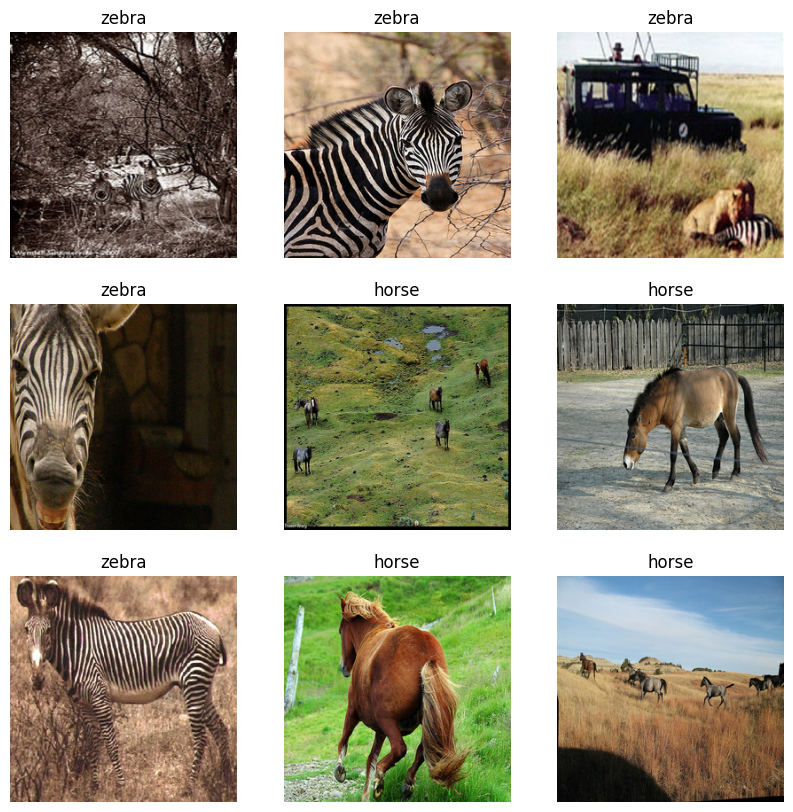

In [4]:
class_names = train.class_names
plt.figure(figsize=(10, 10))
len = 0
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        len = images[i].shape
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
shape = tuple(len)

In [14]:
model = Sequential()
mob = tf.keras.applications.MobileNetV2(input_shape=shape,include_top=False,weights='imagenet')
model.add(mob)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 1)                 81921     
                                                                 
Total params: 2339905 (8.93 MB)
Trainable params: 2305793 (8.80 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')
model.fit(train,epochs=20)

Epoch 1/20


2023-08-28 11:14:24.446208: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1f0c3c50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-28 11:14:24.446230: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-08-28 11:14:24.448701: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-28 11:14:24.507971: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76/76 [==============================] - 25s 159ms/step - loss: 0.3552 - accuracy: 0.9350
Epoch 2/20
76/76 [==============================] - 11s 150ms/step - loss: 0.3974 - accuracy: 0.9338
Epoch 3/20
76/76 [==============================] - 11s 150ms/step - loss: 0.1135 - accuracy: 0.9604
Epoch 4/20
76/76 [==============================] - 11s 150ms/step - loss: 0.0438 - accuracy: 0.9863
Epoch 5/20
76/76 [==============================] - 11s 150ms/step - loss: 0.0698 - accuracy: 0.9879
Epoch 6/20
33/76 [============>.................] - ETA: 6s - loss: 0.9257 - accuracy: 0.8854

In [ ]:
sess.close()
tf.reset_default_graph()